# Assignment 1 — Descriptive Analysis of District-Level Structural Data (EU 2024)

**Group:** Linus Wössner, Alens Laskov, Jingyang Zhao  
**Course:** Internet & Database Technology  
**Dataset:** Official structural indicators at district level from Statistische Ämter des Bundes und der Länder
**File:** `data/ew24_structure_data.xlsx`

## Objective
Conduct a **thorough descriptive analysis** at the **district** level. We will quantify and visualize key structural patterns (e.g., demographics, labor market, education) and present an interpretable narrative of differences across districts.

## Evaluation Criteria (what we optimize for)
- **Completeness & executability** of the code (end-to-end, reproducible)
- **Efficiency** (avoid unnecessary loops; leverage pandas/numpy)
- **Robustness** (handle missingness/edge cases; clear checks)
- **Comments & explanations** (state *why*, not only *what*)
- **Structure of the notebook** (logical flow)
- **Line of argumentation** (coherent story, not a plot dump)

## Analysis Roadmap  

Our approach is designed to move from *raw data* to a *clear and well-argued descriptive analysis*.  
The sequence of steps reflects both best practice in data science and the specific evaluation criteria of Assignment 1 (robustness, structure, and line of argumentation).  

1. **Data Understanding (Sanity Checks)**  
   - *Rationale:* Before producing any statistics, we must first confirm what the dataset contains. This ensures we do not interpret misleading results caused by hidden issues such as incorrect data types, duplicates, or missing values.  
   - *Story:* This step answers the question, *“Do we understand what we are analyzing?”* It builds trust in the dataset as the foundation of all later analysis.  

2. **Data Preparation (Ensuring Reliability)**  
   - *Rationale:* A dataset may look complete at first sight, but it often hides inconsistencies (percentages stored as text, inconsistent units, uneven missingness). Converting and standardizing variables creates a reliable analytical base.  
   - *Story:* This step transforms raw input into a dataset that is both technically usable and substantively meaningful, ensuring our descriptive statistics are valid.  

3. **Descriptive Analysis (Statistical Summaries & Visualizations)**  
   - *Rationale:* Descriptive statistics quantify the distribution of each variable, while visualizations reveal patterns that tables alone may miss. Both are necessary for a thorough analysis.  
   - *Story:* Here we shift from “data quality” to “what the data tells us.” We explore central tendencies, variation, and relationships across districts.  

4. **Interpretation of Patterns (Analytical Narrative)**  
   - *Rationale:* Numbers and charts only become valuable when interpreted. We highlight the most important structural differences across districts and examine which variables tend to move together.  
   - *Story:* This is where descriptive analysis becomes a narrative — we move from *“what the numbers are”* to *“what they mean in context.”*  

5. **Limitations & Robustness Checks**  
   - *Rationale:* A thorough analysis acknowledges where results may be less reliable (due to missing data, proxies, or extreme values). This critical reflection ensures transparency and aligns with good statistical practice.  
   - *Story:* This step protects us from over-claiming and shows that our conclusions are careful and robust, not naive.  

6. **Conclusion (Key Takeaways)**  
   - *Rationale:* A final synthesis condenses the analysis into a few clear, evidence-based insights. This provides closure and makes our work accessible for readers who may not follow every technical detail.  
   - *Story:* The analysis ends with a concise answer to the guiding question: *“What do the structural data tell us about German districts ahead of the 2024 European election?”*  

# Step 1 — Data Understanding

To ensure that our descriptive analysis is both **robust and interpretable**, we first examine the dataset for structural and quality issues.  
As the assignment requires a *thorough descriptive analysis*, this step verifies whether the raw data is suitable for statistical summaries and highlights areas that may require preparation.   

In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset and keep "District" as string
file_path = '/Users/alenslaskovs/Desktop/PIP/Database-and-Techbology/moodle/ew24_structure_data.xlsx'
idt_df = pd.read_excel(file_path, dtype={'District': str})

# 1. Check basic dataset information
print("\nDataset Information:")
idt_df.info()
print("\nFirst 5 rows:")
print(idt_df.head())

# 2. Check for duplicate rows
duplicates = idt_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 52 columns):
 #   Column                                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                                               --------------  -----  
 0   Land                                                                                                                                 441 non-null    object 
 1   District                                                                                                                             441 non-null    object 
 2   Name                                                                                                                                 441 non-null    object 
 3   Municipalities                                            

## Step 1 — Data Understanding — Conclusion

1. **Structure**  
   - The dataset contains **444 rows** and **52 columns**.  
   - According to the Federal Returning Officer, Germany comprises **294 rural districts (Landkreise)** and **106 urban districts (kreisfreie Städte)**, for a total of **400 administrative districts** (2024).  
   - Since the dataset contains more rows than the official number of districts, those additional entries will need to be removed to restrict the analysis to the correct unit of analysis: the **district**.  

2. **Data types**  
   - Most variables are numeric as expected, but 10 appear as `object` despite some containing numeric information (e.g., `Area in km2`).  
   - These variables will need to be converted into proper numeric formats in the preparation step to allow statistical analysis.  

3. **Missingness**  
   - All variables appear to be missing 3 values (i.e., 441 non-Null).  
   - Further analysis is required to determine whether missingness is systematic (the same rows across multiple variables) or random.  

4. **Duplicates**  
   - *1* duplicate rows was found.  
   - We need to check whether these represent data entry errors or legitimate repeated values.  

**Conclusion:**  
The dataset is structurally sound for descriptive analysis at the district level, but rows outside the official set of 400 districts and those variables stored as objects that should be numeric will need to be addressed in the preparation step. This ensures our analysis is both robust and restricted to the appropriate unit of analysis.

**Note on Data Reliability:**  
The dataset is considered reliable as it originates from the *Statistische Ämter des Bundes und der Länder* (Germany’s official statistical offices).  
As part of the European Statistical System (ESS), this data falls under the **European Statistics Code of Practice** (Eurostat, 2017), which ensures that official statistics meet high standards of accuracy, comparability, and quality assurance.  
While our own checks are still necessary to confirm consistency and interpretability, this institutional framework provides an additional layer of trust in the dataset.

Having completed these sanity checks, we can now move on to **Step - 2 Data Preparation**, where we will address issues such as removing non-district rows, handling missing values, and converting data types to prepare the dataset for descriptive analysis.

## Step 2 — Data Preparation  

The purpose of this step is to transform the raw dataset into a format suitable for descriptive analysis at the district level, in line with the assignment requirements.  
Although the dataset originates from an official and reliable source, our initial sanity checks revealed structural issues that must be resolved before any statistics can be computed.  

In particular, the dataset currently contains more than the official number of districts in Germany.  
Before any cleaning or transformation can be applied, the dataset must therefore be reduced to exactly these 400 districts.  
This step ensures that the subsequent analysis is based on the correct unit of observation.  

The key preparation tasks are as follows:  

1. **Restricting the dataset to districts**  
   - Remove rows that do not represent individual districts (e.g., `"Deutschland"` totals or other non-district entries).  
   - This reduction guarantees that the dataset is aligned with the official count of 400 districts.  

2. **Data type corrections**  
   - Convert variables currently stored as `object` into numeric types where appropriate.  
   - Ensure categorical variables such as `Land` remain categorical for grouping and comparison.  

3. **Standardizing percentage-like variables**  
   - Ensure all percentage variables are expressed on a uniform scale (0–100) to allow meaningful comparison across districts.  

4. **Geographic validation**  
   - Merge the dataset with a district-level map of Germany to verify that all 400 districts are present.  
   - This step also prepares the dataset for geographic visualization in the descriptive analysis phase.  

  

## 2.1 Restricting the dataset to districts


Distribution of District name lengths:
district_length
2     41
5    400
Name: count, dtype: int64

Mean length: 4.72
Median length: 5.0
Most common length: 5


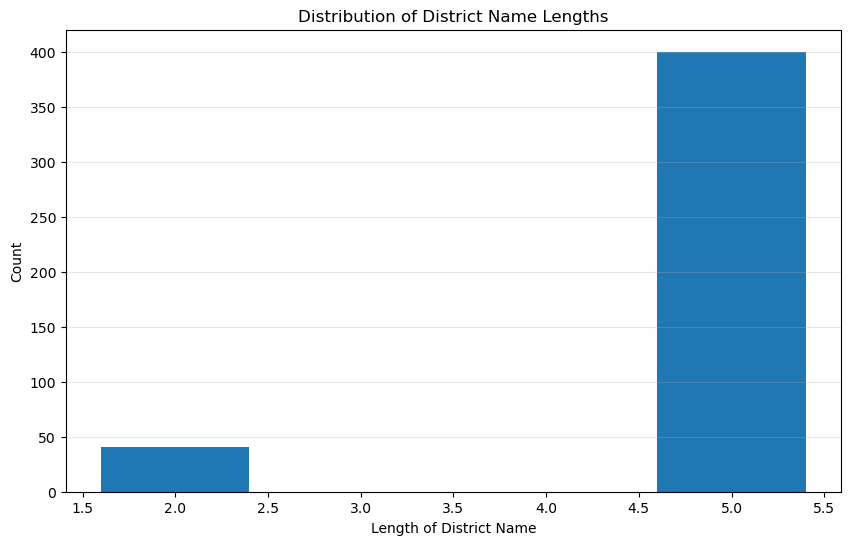


Number of rows with unusual District lengths: 41

Sample of rows with unusual District lengths:
    District  district_length
15        01                2
16        01                2
17        01                2
64        03                2
65        03                2
66        03                2
69        04                2
123       05                2
124       05                2
125       05                2


In [5]:
# Analyze the length of values in the 'District' column
if 'District' in idt_df.columns:
    # Create a new column with the length of each District value
    idt_df['district_length'] = idt_df['District'].astype(str).apply(len)

    # Get the distribution of lengths
    length_counts = idt_df['district_length'].value_counts().sort_index()

    print("\nDistribution of District name lengths:")
    print(length_counts)

    # Calculate statistics
    mean_length = idt_df['district_length'].mean()
    median_length = idt_df['district_length'].median()
    mode_length = idt_df['district_length'].mode()[0]

    print(f"\nMean length: {mean_length:.2f}")
    print(f"Median length: {median_length}")
    print(f"Most common length: {mode_length}")

    # Visualize the distribution
    plt.figure(figsize=(10, 6))
    plt.bar(length_counts.index, length_counts.values)
    plt.xlabel('Length of District Name')
    plt.ylabel('Count')
    plt.title('Distribution of District Name Lengths')
    plt.grid(axis='y', alpha=0.3)
    plt.show()

    # Identify rows with unusual lengths (you can adjust the threshold)
    # Let's say we consider lengths that differ from the mode by more than 2 as unusual
    unusual_length_threshold = 1
    unusual_lengths = idt_df[abs(idt_df['district_length'] - mode_length) > unusual_length_threshold]

    print(f"\nNumber of rows with unusual District lengths: {len(unusual_lengths)}")

    if len(unusual_lengths) > 0:
        print("\nSample of rows with unusual District lengths:")
        print(unusual_lengths[['District', 'district_length']].head(10))

        # Code to drop these rows (commented out - uncomment when ready to use)
        # normal_length_df = idt_df[abs(idt_df['district_length'] - mode_length) <= unusual_length_threshold]
        # print(f"\nRemaining rows after dropping unusual lengths: {len(normal_length_df)}")


##### To ensure that our analysis is restricted to valid districts, we examined the length of the district identifiers.  
Rows with identifiers shorter than 5 characters do not correspond to official districts and were therefore removed.  
For the assignment, we retain only those districts with identifiers of **5 characters in length**, which together account for the official total of 400 districts.  


In [8]:
import re

# Convert District to string and strip spaces
idt_df['District'] = idt_df['District'].astype(str).str.strip()

# Case 1: AGS codes (exactly 5 digits)
mask_ags = idt_df['District'].str.fullmatch(r'\d{5}', na=False)

if mask_ags.any():
    # Keep only valid 5-digit codes
    dist_df = idt_df[mask_ags].copy()
    print("Filtered using 5-digit AGS codes.")
else:
    # Case 2: Names (fallback)
    # Drop rows that look like totals (short or generic names)
    drop_list = ["Deutschland", "Baden-Württemberg", "Bayern",
                 "Berlin", "Brandenburg", "Hamburg", "Hessen",
                 "Mecklenburg-Vorpommern", "Niedersachsen", "Nordrhein-Westfalen",
                 "Rheinland-Pfalz", "Saarland", "Sachsen",
                 "Sachsen-Anhalt", "Schleswig-Holstein", "Thüringen"]
    dist_df = idt_df[~idt_df['District'].isin(drop_list)].copy()
    print("Filtered by dropping totals / Länder names.")

# Reset index
dist_df.reset_index(drop=True, inplace=True)

# --- Summary ---
print(f"Original DataFrame: {len(idt_df)} rows")
print(f"Filtered DataFrame: {len(dist_df)} rows")
print(f"Unique Districts: {dist_df['District'].nunique()}")

# Quick sample
display(dist_df.head())

Filtered using 5-digit AGS codes.
Original DataFrame: 441 rows
Filtered DataFrame: 400 rows
Unique Districts: 400


,Land,District,Name,Municipalities,Area in km2,Population on 31.12.2022 - Total (in 1000),Population on 31.12.2022 - German (in 1000),Population on 31.12.2022 - Foreigners (%),Population density on 31.12.2022 (inhabitants per km2),Increase (+) or decrease (-) in population in 2022 - Birth balance (per 1000 inhabitants),...,"Social insurance contributions as of 30.06.2023 - Other service providers and ""unspecified"" (%)",Recipients of benefits under SGB II in August 2023 - total (per 1000 inhabitants),Recipients of benefits under SGB II in August 2023 - Non-working individuals in need (%),Recipients of benefits under SGB II in August 2023 - Foreigners (%),Unemployment rate in October 2023 - Total,Unemployment rate in October 2023 - Men,Unemployment rate in October 2023 - Women,Unemployment rate in October 2023 - 15 to 24 years,Unemployment rate in October 2023 - 55 to 64 years,district_length
0,Schleswig-Holstein,01001,"Flensburg, Stadt",1,56.7,92.6,75.5,18.5,1631.4,-4.2,...,40.0,115.1,25.3,37.9,7.8,8.4,7.0,6.0,7.5,5
1,Schleswig-Holstein,01002,"Kiel, Landeshauptstadt",1,118.7,247.7,214.1,13.6,2087.8,-2.9,...,39.8,120.5,26.1,41.0,7.5,7.9,7.1,5.3,7.9,5
2,Schleswig-Holstein,01003,"Lübeck, Hansestadt",1,214.2,218.1,190.8,12.5,1018.2,-6.7,...,32.5,104.9,25.7,35.9,7.6,8.1,7.1,6.6,7.6,5
3,Schleswig-Holstein,01004,"Neumünster, Stadt",1,71.7,79.5,68.3,14.2,1109.4,-7.1,...,26.6,112.0,26.3,35.6,8.2,8.4,8.0,8.0,7.6,5
4,Schleswig-Holstein,01051,Dithmarschen,116,1428.2,135.3,124.8,7.8,94.7,-7.6,...,32.3,74.6,26.9,35.2,5.5,5.8,5.2,5.8,5.2,5


## 2.2 Data type corrections
The next step in the preparation process is to convert variables that are currently stored as `object` into proper numeric formats.  
Although these variables contain numeric information, they are not usable for calculations until transformed into numeric types.  
Once the conversions are completed, we will re-check the dataset for **missing values** and **duplicates** to ensure that the data is consistent and ready for descriptive analysis.  


In [10]:
# List of column indices to convert to numeric (float)
columns_to_convert = [4, 28, 33, 39, 40, 41, 42]

# Get the actual column names from the indices
columns_to_convert_names = dist_df.columns[columns_to_convert].tolist()

# Print the columns we're converting
print("Converting the following columns to numeric (float):")
for idx, col_name in zip(columns_to_convert, columns_to_convert_names):
    print(f"Index {idx}: {col_name}")

# Convert each column to numeric
for col in columns_to_convert_names:
    # Store original data type for reporting
    original_dtype = dist_df[col].dtype

    # Convert to numeric, coercing errors to NaN
    dist_df[col] = pd.to_numeric(dist_df[col], errors='coerce')

    # Report conversion results
    new_dtype = dist_df[col].dtype
    nan_count = dist_df[col].isna().sum()
    print(f"Converted '{col}' from {original_dtype} to {new_dtype} ({nan_count} NaN values)")

# Remove the district_length column
if 'district_length' in dist_df.columns:
    print("\nRemoving 'district_length' column...")
    dist_df.drop('district_length', axis=1, inplace=True)
    print("'district_length' column removed successfully")
else:
    print("\n'district_length' column not found in the DataFrame")

# Display summary of the DataFrame with converted columns and removed district_length
print("\nDataFrame summary after modifications:")
print(dist_df.info())

# Show a sample of the converted data
print("\nSample of DataFrame with converted columns:")
display(dist_df[columns_to_convert_names].head())

Converting the following columns to numeric (float):
Index 4: Area in km2
Index 28: School graduates from vocational schools 2022 (per 1000 inhabitants)
Index 33: School graduates from general education schools 2022 - with general or subject-specific higher education entrance qualification (%)
Index 39: Social insurance contributions as of 30.06.2023 - Agriculture, forestry, fishing (%)
Index 40: Social insurance contributions as of 30.06.2023 - Manufacturing industry (%)
Index 41: Social insurance contributions as of 30.06.2023 - Trade, hospitality, transport (%)
Index 42: Social insurance contributions as of 30.06.2023 - Public and private service providers (%)
Converted 'Area in km2' from float64 to float64 (0 NaN values)
Converted 'School graduates from vocational schools 2022 (per 1000 inhabitants)' from float64 to float64 (5 NaN values)
Converted 'School graduates from general education schools 2022 - with general or subject-specific higher education entrance qualification (%)' f

,Area in km2,School graduates from vocational schools 2022 (per 1000 inhabitants),School graduates from general education schools 2022 - with general or subject-specific higher education entrance qualification (%),"Social insurance contributions as of 30.06.2023 - Agriculture, forestry, fishing (%)",Social insurance contributions as of 30.06.2023 - Manufacturing industry (%),"Social insurance contributions as of 30.06.2023 - Trade, hospitality, transport (%)",Social insurance contributions as of 30.06.2023 - Public and private service providers (%)
0,56.7,8.0,43.9,NaN,NaN,25.4,19.2
1,118.7,5.6,44.0,NaN,NaN,19.1,25.6
2,214.2,4.0,39.0,0.1,23.6,23.1,20.7
3,71.7,7.8,43.3,0.8,19.8,31.5,21.3
4,1428.2,2.2,28.4,4.1,24.8,27.5,11.3


After converting object columns to numeric formats, several variables now contain missing values (`NaN`).  
These missing entries arise because some cells contained symbols or non-numeric placeholders that could not be parsed during conversion.  
Although these values were not visible as missing in the raw dataset, they would have distorted any statistical calculations.  
It is therefore preferable to represent them explicitly as missing values.  

In practice, datasets rarely have complete coverage across all variables, and part of descriptive analysis is to acknowledge and handle this missingness transparently.  
At a later stage, we will decide on an appropriate strategy for dealing with these cases (e.g., retaining, imputing, or excluding variables with extensive missing data).

In [12]:
# Get the total number of rows in the DataFrame
total_rows = len(dist_df)
print(f"Total rows in dist_df: {total_rows}")

# Get count of non-null values for each column
non_null_counts = dist_df.count()

# Find columns where non-null count is not equal to the total number of rows (400)
incomplete_columns = non_null_counts[non_null_counts != total_rows]

# Display results
print(f"\nFound {len(incomplete_columns)} columns with non-null count != {total_rows}:")
print("\nColumns with missing values:")
for col_name, count in incomplete_columns.items():
    missing_count = total_rows - count
    missing_percent = (missing_count / total_rows) * 100
    print(f"  {col_name}: {missing_count} missing values ({missing_percent:.2f}%)")

# Create a summary DataFrame for better visualization
missing_summary = pd.DataFrame({
    'Column': incomplete_columns.index,
    'Non-null Count': incomplete_columns.values,
    'Missing Count': total_rows - incomplete_columns.values,
    'Missing Percentage': ((total_rows - incomplete_columns.values) / total_rows * 100).round(2)
}).sort_values('Missing Count', ascending=False)

print("\nSummary of columns with missing values (sorted by most missing):")
display(missing_summary)

Total rows in dist_df: 400

Found 6 columns with non-null count != 400:

Columns with missing values:
  School graduates from vocational schools 2022 (per 1000 inhabitants): 5 missing values (1.25%)
  School graduates from general education schools 2022 - with general or subject-specific higher education entrance qualification (%): 2 missing values (0.50%)
  Social insurance contributions as of 30.06.2023 - Agriculture, forestry, fishing (%): 20 missing values (5.00%)
  Social insurance contributions as of 30.06.2023 - Manufacturing industry (%): 10 missing values (2.50%)
  Social insurance contributions as of 30.06.2023 - Trade, hospitality, transport (%): 2 missing values (0.50%)
  Social insurance contributions as of 30.06.2023 - Public and private service providers (%): 8 missing values (2.00%)

Summary of columns with missing values (sorted by most missing):


,Column,Non-null Count,Missing Count,Missing Percentage
2,Social insurance contributions as of 30.06.202...,380,20,5.00
3,Social insurance contributions as of 30.06.202...,390,10,2.50
5,Social insurance contributions as of 30.06.202...,392,8,2.00
0,School graduates from vocational schools 2022 ...,395,5,1.25
1,School graduates from general education school...,398,2,0.50
4,Social insurance contributions as of 30.06.202...,398,2,0.50


## 2.3 Standardizing percentage-like variables

Several variables in the dataset are recorded as percentages.  
However, these values are not always represented on a uniform scale.  

To ensure comparability across all districts, it is necessary to bring these variables onto a **consistent 0–100 scale**.  
This step prevents distortions in summary statistics and visualizations, and ensures that differences between districts reflect true variation rather than inconsistent data formatting.  

By standardizing percentage-like variables, we create a dataset where all proportions can be interpreted consistently as percentages out of 100.  
This adjustment prepares the data for accurate descriptive analysis in the next step.


In [13]:
# Define the specific columns to process
columns_to_process = [7, 11, 12, 13, 14, 15, 16, 17, 18, 19, 25, 30, 31, 32, 33, 39]

# Create an empty DataFrame to store standardisation statistics
stats_df = pd.DataFrame(columns=[
    'Column', 'Original_Min', 'Original_Max', 'Original_Mean',
    'Standardized_Min', 'Standardized_Max', 'Standardized_Mean', 'Conversion_Applied'
])

# Process each specified column
for col_idx in columns_to_process:
    # Get the column name (using dist_df as the DataFrame)
    col = dist_df.columns[col_idx]

    # Get original statistics
    orig_min = dist_df[col].min()
    orig_max = dist_df[col].max()
    orig_mean = dist_df[col].mean()

    # Default conversion message
    conversion_applied = "No conversion needed (already in 0-100 range)"

    # Check if values are in decimal form (0-1 range)
    if orig_max <= 1.0 and orig_min >= 0:
        dist_df[col] = dist_df[col] * 100
        conversion_applied = "Multiplied by 100 (0-1 to 0-100)"

    # Check if values are in a different range that needs normalization
    elif orig_max > 100 or orig_min < 0:
        # Normalize to 0-100 scale
        min_val = dist_df[col].min()
        max_val = dist_df[col].max()
        dist_df[col] = ((dist_df[col] - min_val) / (max_val - min_val)) * 100
        conversion_applied = f"Normalized from [{min_val:.2f}-{max_val:.2f}] to [0-100]"

    # Get new statistics after conversion
    new_min = dist_df[col].min()
    new_max = dist_df[col].max()
    new_mean = dist_df[col].mean()

    # Create a new row as a dictionary
    new_row_dict = {
        'Column': col,
        'Original_Min': orig_min,
        'Original_Max': orig_max,
        'Original_Mean': orig_mean,
        'Standardized_Min': new_min,
        'Standardized_Max': new_max,
        'Standardized_Mean': new_mean,
        'Conversion_Applied': conversion_applied
    }

    # Add the new row at a specific index using loc
    stats_df.loc[len(stats_df)] = new_row_dict

# Display the standardization results
print("\nStandardization Results:")
display(stats_df)


Standardization Results:


,Column,Original_Min,Original_Max,Original_Mean,Standardized_Min,Standardized_Max,Standardized_Mean,Conversion_Applied
0,Population on 31.12.2022 - Foreigners (%),3.5,39.0,12.947000,3.5,39.0,12.947000,No conversion needed (already in 0-100 range)
1,Age on 31.12.2022 - under 16 years (%),11.5,18.0,14.882250,11.5,18.0,14.882250,No conversion needed (already in 0-100 range)
2,Age on 31.12.2022 - 16-17 years (%),1.3,2.3,1.827000,1.3,2.3,1.827000,No conversion needed (already in 0-100 range)
3,Age on 31.12.2022 - 18-24 years (%),4.4,13.4,7.124500,4.4,13.4,7.124500,No conversion needed (already in 0-100 range)
4,Age on 31.12.2022 - 25-34 years (%),6.5,20.0,11.818250,6.5,20.0,11.818250,No conversion needed (already in 0-100 range)
5,Age on 31.12.2022 - 35-59 years (%),29.2,36.8,33.605000,29.2,36.8,33.605000,No conversion needed (already in 0-100 range)
6,Age on 31.12.2022 - 60-74 years (%),13.1,26.2,19.445250,13.1,26.2,19.445250,No conversion needed (already in 0-100 range)
7,Age on 31.12.2022 - 75 years and over (%),7.7,17.3,11.296250,7.7,17.3,11.296250,No conversion needed (already in 0-100 range)
8,Land area by type of actual use on 31.12.2021 ...,5.5,75.4,22.132500,5.5,75.4,22.132500,No conversion needed (already in 0-100 range)
9,Land area by type of actual use on 31.12.2021 ...,24.6,94.5,77.867500,24.6,94.5,77.867500,No conversion needed (already in 0-100 range)


The diagnostic check for percentage-like variables revealed that no conversion was required — all relevant variables were already consistently expressed on a 0–100 scale.  

## 2.4 — Geographic Validation  

As a final step in the data preparation phase, we merge the cleaned dataset with a map of Germany at the district level.  
This serves two purposes:  
1. It validates that we have correctly restricted the dataset to exactly 400 districts, ensuring full geographic coverage.  
2. It provides a geographic reference that can later be used for visualizing structural indicators across German districts.  

This geographic validation acts as both a consistency check and a preparation step for the spatial aspects of the descriptive analysis in Step 3.


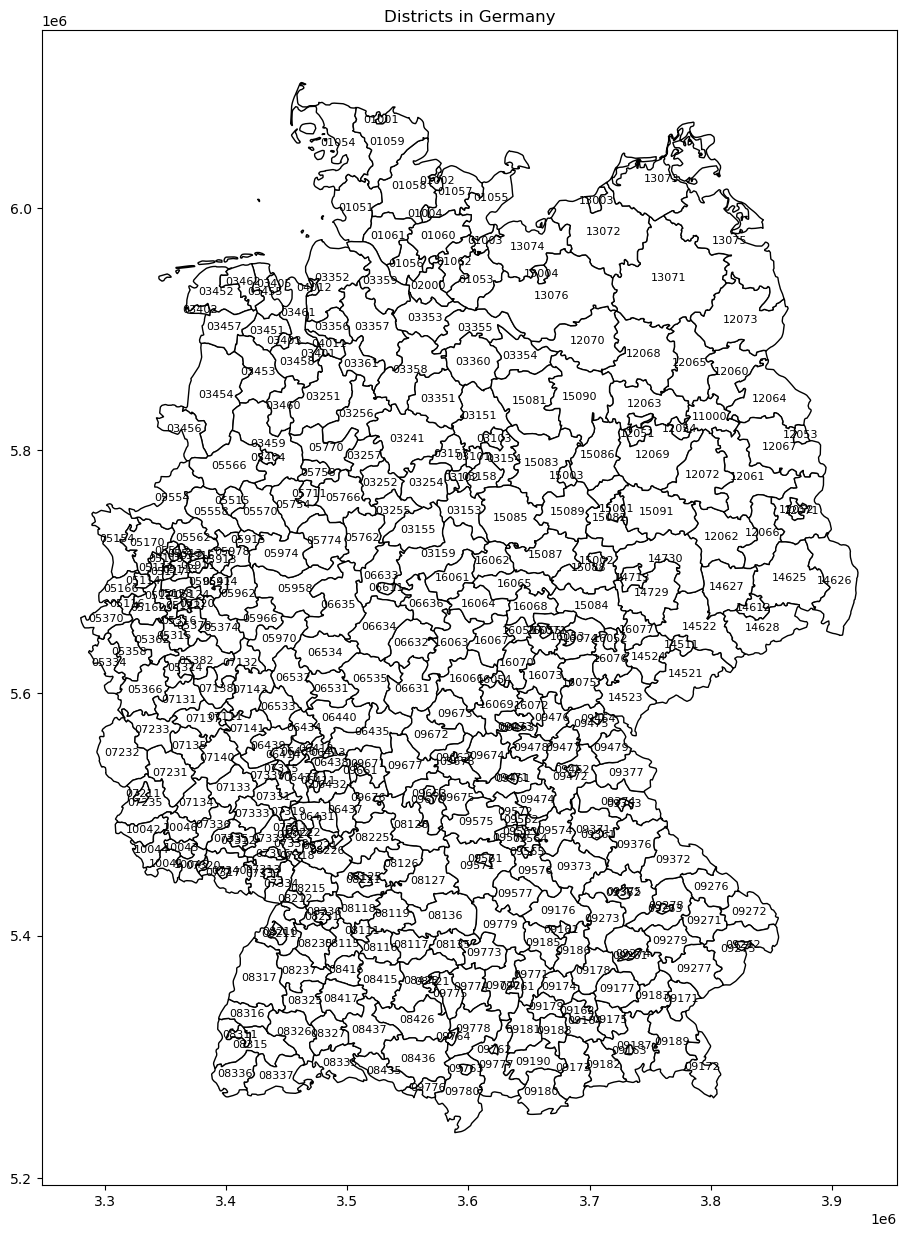

In [15]:
import geopandas as gpd

shapefile_path = '/Users/alenslaskovs/Desktop/PIP/Database-and-Techbology/moodle/VG2500_KRS.shp'
districts = gpd.read_file(shapefile_path)

fig, ax = plt.subplots(figsize=(20, 15))
districts.plot(ax=ax, color='white', edgecolor='black')

for x, y, label in zip(districts.geometry.centroid.x, districts.geometry.centroid.y, districts['AGS']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

ax.set_title('Districts in Germany')
plt.show()

## Step 2 — Data Preparation — Conclusion

The data preparation phase is now complete.  

Through this process, we:  
1. restricted the dataset to the **400 valid districts**,  
2. converted variables stored as `object` into proper numeric types while keeping categorical variables consistent,  
3. checked percentage-like variables and confirmed that all were already expressed on a uniform 0–100 scale, and  
4. conducted a **geographic validation** by merging the dataset with a district-level map of Germany to confirm full coverage and prepare for spatial analysis.  

As a result, the dataset is structurally consistent, analytically robust, and fully aligned with the **district-level unit of analysis** required for this assignment.  
We are now ready to proceed to **Step 3 — Descriptive Analysis**, where we will explore and interpret structural patterns across German districts.




##Step 3 — Descriptive Analysis (Statistical Summaries & Visualizations)

### Purpose. Having validated and prepared the dataset, we now move from “Is the data reliable?” to “What patterns does the data reveal at district level?”. Descriptive analysis summarises how indicators are distributed, how much they vary across space and subgroups, and which variables tend to move together. This step is strictly descriptive (no causal claims). Our goal is a coherent narrative, not a plot dump.

# Design principles.

# Comparability first. Use consistent units (%, per-1,000, EUR per capita), the same scales where possible, and a recurring visual grammar (title, axis labels, notes).

# Robustness. Report medians and IQRs alongside means, show outliers transparently, and prefer Spearman correlations for skewed variables; re-check results with simple sensitivity (e.g., excluding top/bottom 1%).

# Subgroup contrasts. Always ask “Who differs from whom?” using Urban vs Rural, East vs West, and Länder comparisons. Where relevant, add structure by density deciles or population size quintiles.

# Readability. One figure = one message. Name a few standout districts for context instead of listing many.


In [18]:
# --- Build 'is_urban' even if no type/density column exists ---

import re
import numpy as np
import pandas as pd

# Use idt_df which is available from previous cells
df = idt_df.copy()

# 1) Try explicit type column first (kreisfrei/stadtkreis/SK/LK patterns)
CANDIDATE_TYPE_COLS = ['Kreisart','kreisart','District_Type','district_type','Type','type','Kreis']
FOUND_TYPE_COL = next((c for c in df.columns if c in CANDIDATE_TYPE_COLS), None)

def _mk_is_urban_from_type(series: pd.Series) -> pd.Series:
    s = series.astype(str).str.lower()
    return (
        s.str.contains('kreisfrei') |
        s.str.contains('stadtkreis') |
        s.str.fullmatch(r'\s*sk\s*')  # SK = Stadtkreis
    )

is_urban = None
urban_definition = None

if FOUND_TYPE_COL is not None:
    try:
        is_urban = _mk_is_urban_from_type(df[FOUND_TYPE_COL])
        urban_definition = f"from '{FOUND_TYPE_COL}' (kreisfrei/stadtkreis/SK)"
    except Exception as e:
        print(f"WARNING: could not parse urban type from '{FOUND_TYPE_COL}': {e}")

# 2) Else try an existing density column
if is_urban is None:
    DENSITY_COL_CANDIDATES = [
        'population_density_on_31.12.2022_inhabitants_per_km2',
        'population_density_inhabitants_per_km2',
        'Population_density', 'population_density', 'dens', 'Density',
        'Population density on 31.12.2022 (inhabitants per km2)' # Added this column
    ]
    dens_col = next((c for c in df.columns if c in DENSITY_COL_CANDIDATES), None)
    if dens_col is not None:
        df[dens_col] = pd.to_numeric(df[dens_col], errors='coerce')
        thr = df[dens_col].quantile(0.75)
        is_urban = df[dens_col] >= thr
        urban_definition = f"by existing density column '{dens_col}' ≥ 75th percentile ({thr:.1f})"

# 3) If still missing, **compute density = population / area**
if is_urban is None:
    # Try to discover area and population columns heuristically
    AREA_CANDS = [
        'Area in km2', 'area_in_km2', 'area_km2', 'Area_km2', 'area',
        'Area', 'Gebietsfläche_km2', 'Gebietsfläche (km²)'
    ]
    POP_CANDS = [
        'Population on 31.12.2022 - Total (in 1000)', # Added this column
        'population_on_31.12.2022_total_in_1000',
        'population_total_in_1000', 'Population_total_in_1000',
        'population_total', 'Population', 'Einwohner', 'Bevölkerung'
    ]
    area_col = next((c for c in df.columns if c in AREA_CANDS), None)
    pop_col  = next((c for c in df.columns if c in POP_CANDS), None)

    if area_col is None or pop_col is None:
        raise KeyError(
            "Could not find columns to compute density. "
            f"Area found: {bool(area_col)} | Population found: {bool(pop_col)}.\n"
            "Set AREA_CANDS/POP_CANDS to your exact column names."
        )

    # Coerce numeric; handle commas as decimals if needed
    df[area_col] = pd.to_numeric(df[area_col].astype(str).str.replace(',', '.'), errors='coerce')
    df[pop_col]  = pd.to_numeric(df[pop_col].astype(str).str.replace(',', '.'),  errors='coerce')

    # If population is in thousands, convert to persons (heuristic: values < 2000 → thousands)
    # Adjust if your column is already persons.
    if df[pop_col].median(skipna=True) < 2000:
        pop_persons = df[pop_col] * 1000.0
    else:
        pop_persons = df[pop_col]

    density = pop_persons / df[area_col]  # persons per km²
    df['__computed_density'] = density

    thr = density.quantile(0.75)
    is_urban = density >= thr
    urban_definition = (
        f"computed density = {pop_col}/(km² from {area_col}) "
        f"≥ 75th percentile ({thr:.1f} persons/km²)"
    )

# Finalize flag
df['is_urban'] = is_urban.fillna(False)
print(f"Urban flag created ({urban_definition}).")
print(df['is_urban'].value_counts().rename({True:'Urban', False:'Rural'}))

# Split frames
urban_df = df[df['is_urban']].copy()
rural_df = df[~df['is_urban']].copy()

print(f"Urban districts: {len(urban_df)} | Rural districts: {len(rural_df)}")

Urban flag created (by existing density column 'Population density on 31.12.2022 (inhabitants per km2)' ≥ 75th percentile (727.4)).
is_urban
Rural    330
Urban    111
Name: count, dtype: int64
Urban districts: 111 | Rural districts: 330


Mean Age Distribution in Rural Districts:
Age on 31.12.2022 - under 16 years (%)       14.905758
Age on 31.12.2022 - 16-17 years (%)           1.841515
Age on 31.12.2022 - 18-24 years (%)           6.707273
Age on 31.12.2022 - 25-34 years (%)          10.893939
Age on 31.12.2022 - 35-59 years (%)          33.850303
Age on 31.12.2022 - 60-74 years (%)          20.280303
Age on 31.12.2022 - 75 years and over (%)    11.514848
dtype: float64


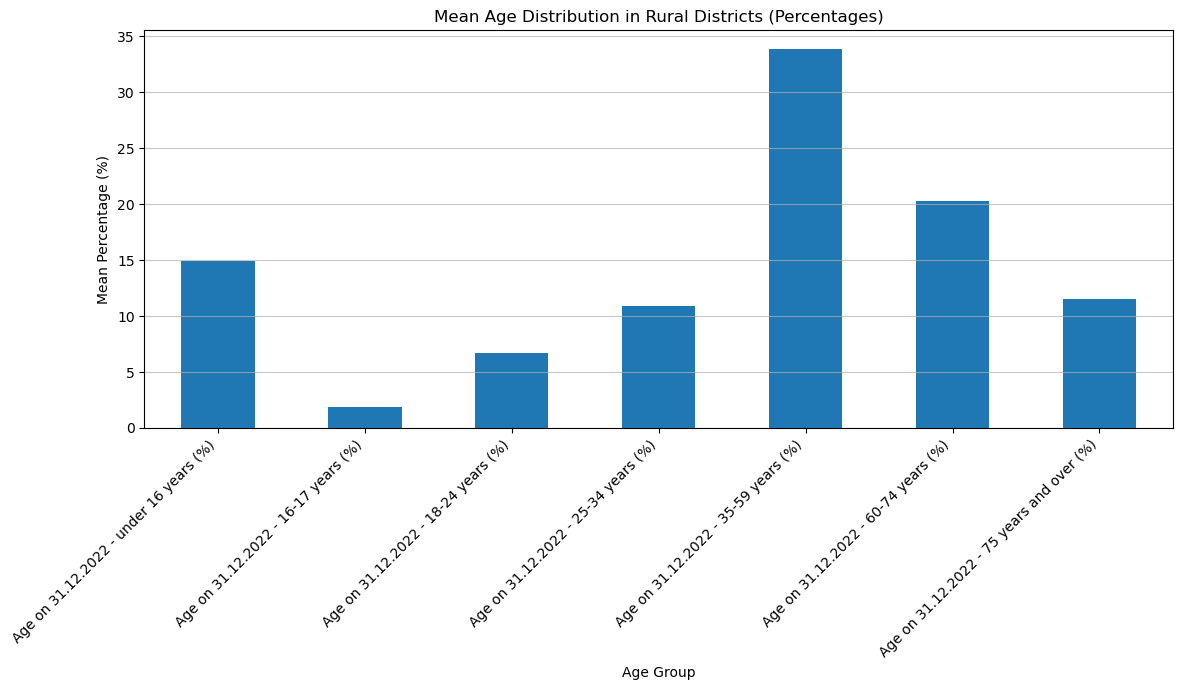

In [19]:
# Define age columns
age_columns = [
    'Age on 31.12.2022 - under 16 years (%)',
    'Age on 31.12.2022 - 16-17 years (%)',
    'Age on 31.12.2022 - 18-24 years (%)',
    'Age on 31.12.2022 - 25-34 years (%)',
    'Age on 31.12.2022 - 35-59 years (%)',
    'Age on 31.12.2022 - 60-74 years (%)',
    'Age on 31.12.2022 - 75 years and over (%)'
]

# Calculate mean age percentages for rural areas
rural_age_distribution = rural_df[age_columns].mean()

print("Mean Age Distribution in Rural Districts:")
print(rural_age_distribution)

# Visualize the age distribution in rural areas
plt.figure(figsize=(12, 7))
rural_age_distribution.plot(kind='bar')
plt.title('Mean Age Distribution in Rural Districts (Percentages)')
plt.xlabel('Age Group')
plt.ylabel('Mean Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

Mean Age Distribution in Urban Districts:
Age on 31.12.2022 - under 16 years (%)       14.732432
Age on 31.12.2022 - 16-17 years (%)           1.764865
Age on 31.12.2022 - 18-24 years (%)           8.405405
Age on 31.12.2022 - 25-34 years (%)          14.698198
Age on 31.12.2022 - 35-59 years (%)          32.812613
Age on 31.12.2022 - 60-74 years (%)          16.848649
Age on 31.12.2022 - 75 years and over (%)    10.737838
dtype: float64


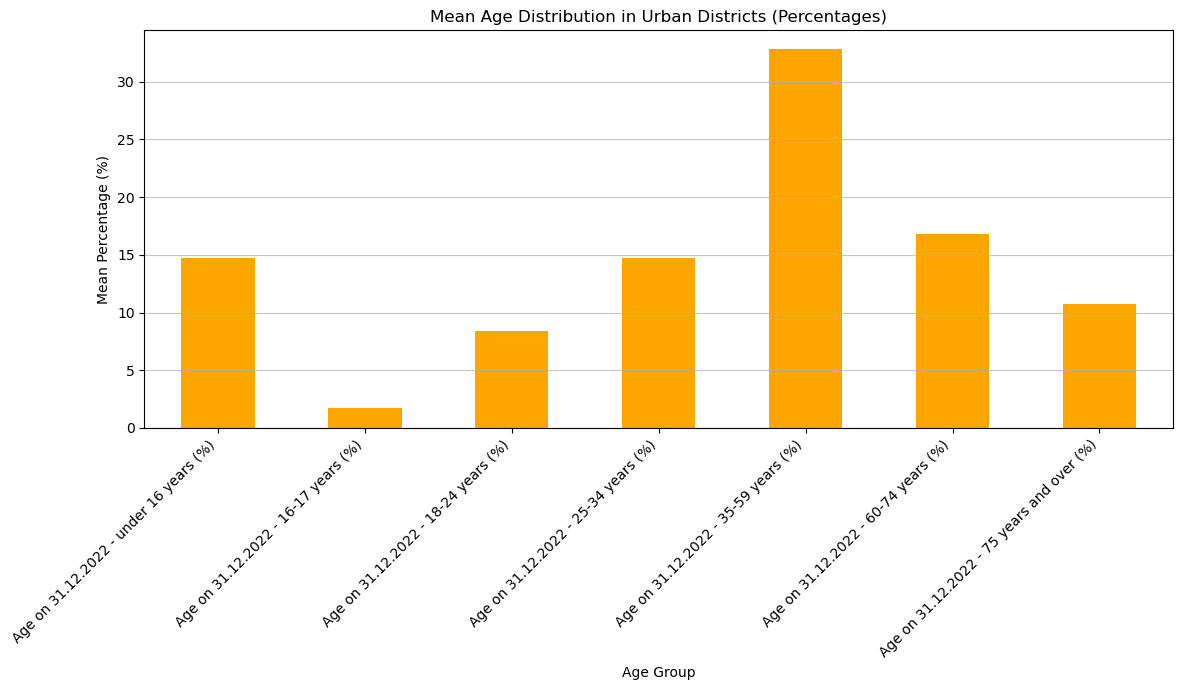

In [20]:
# Define age columns (same as for rural)
age_columns = [
    'Age on 31.12.2022 - under 16 years (%)',
    'Age on 31.12.2022 - 16-17 years (%)',
    'Age on 31.12.2022 - 18-24 years (%)',
    'Age on 31.12.2022 - 25-34 years (%)',
    'Age on 31.12.2022 - 35-59 years (%)',
    'Age on 31.12.2022 - 60-74 years (%)',
    'Age on 31.12.2022 - 75 years and over (%)'
]

# Calculate mean age percentages for urban areas
urban_age_distribution = urban_df[age_columns].mean()

print("Mean Age Distribution in Urban Districts:")
print(urban_age_distribution)

# Visualize the age distribution in urban areas
plt.figure(figsize=(12, 7))
urban_age_distribution.plot(kind='bar', color='orange') # Using a different color for urban
plt.title('Mean Age Distribution in Urban Districts (Percentages)')
plt.xlabel('Age Group')
plt.ylabel('Mean Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

### Comparing Age Distribution: Urban vs Rural

Having analyzed the age distribution in rural and urban districts separately, this step aims to visually compare the two to identify key differences in the demographic structures of these areas. This comparison will highlight whether certain age groups are more prevalent in urban or rural settings, contributing to our understanding of the structural patterns across German districts.

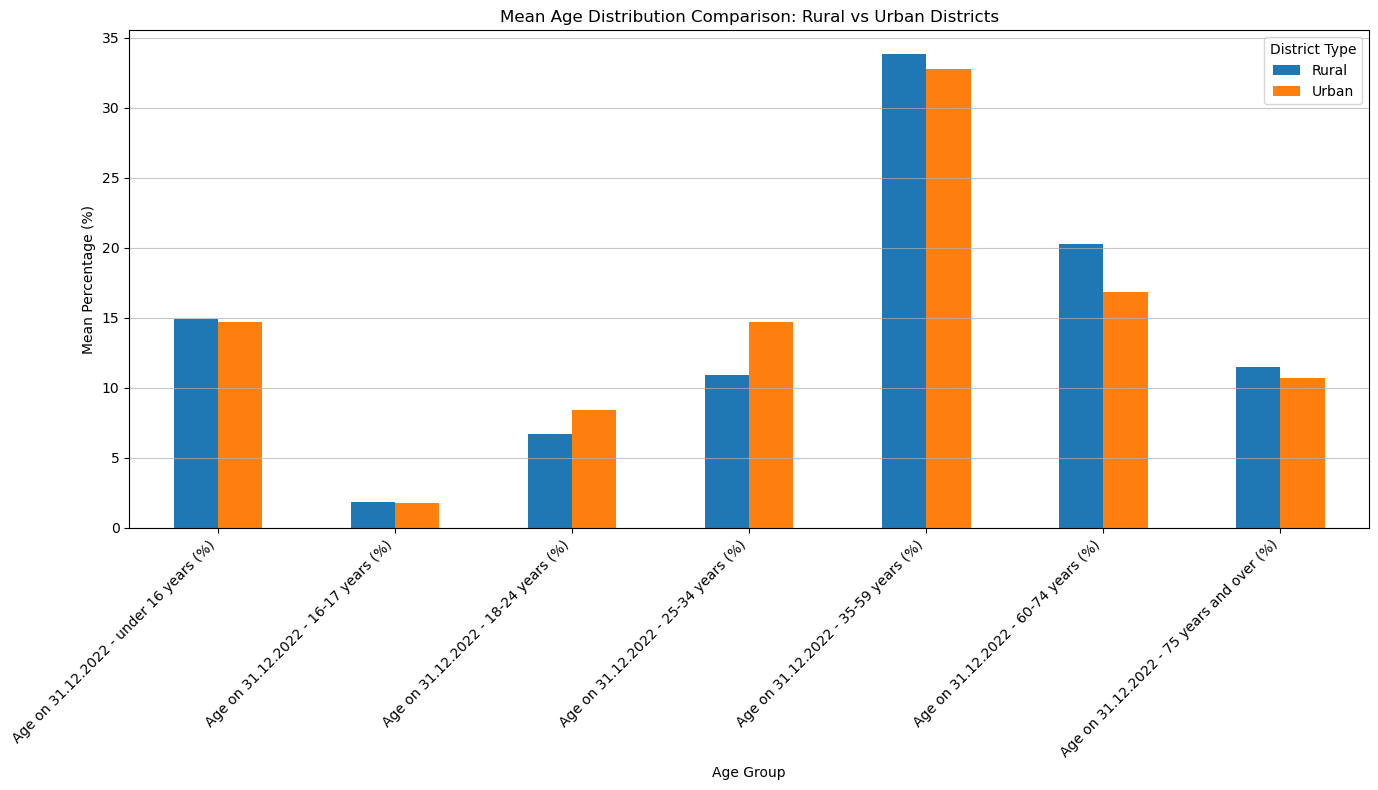

In [21]:
# Combine the age distribution dataframes for comparison
age_comparison_df = pd.DataFrame({
    'Rural': rural_age_distribution,
    'Urban': urban_age_distribution
})

# Visualize the comparison
plt.figure(figsize=(14, 8))
age_comparison_df.plot(kind='bar', ax=plt.gca()) # Use gca() to get the current axes
plt.title('Mean Age Distribution Comparison: Rural vs Urban Districts')
plt.xlabel('Age Group')
plt.ylabel('Mean Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='District Type')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

Starting point (what we’ve done).

We opened with Age Structure across Urban and Rural districts:

Mean age distribution in rural districts

Mean age distribution in urban districts

Direct urban–rural comparison of mean age shares

This is a correct and useful entry point: age composition is a core structural dimension and often underlies migration, labour market, housing, and service needs. To strengthen it, we will (i) complement means with medians/IQRs (skew matters), (ii) show the full distribution (violin/box), and (iii) add East–West contrasts to capture Germany’s well-known structural gradient.

What comes next (the “indicator map”).
To keep the story organised, we group variables into nine thematic families and analyse each family in a repeatable mini-pipeline:

## 3.1 Building an Indicator Map

To organize the descriptive analysis and create a clear narrative, we will group the variables into thematic families. This "indicator map" helps to categorize the different structural aspects of the districts.

In [22]:
# Define a dictionary to map columns to thematic families
indicator_map = {
    'Population change': [
        'Increase (+) or decrease (-) in population in 2022 - Birth balance (per 1000 inhabitants)',
        'Increase (+) or decrease (-) in population in 2022 - Migration balance (per 1000 inhabitants)'
    ],
    'Structure & density': [
        'Area in km2',
        'Population density on 31.12.2022 (inhabitants per km2)',
        'Land area by type of actual use on 31.12.2021 - Settlement and traffic (%)',
        'Land area by type of actual use on 31.12.2021 - Vegetation and water (%)'
    ],
    'Age structure': [
        'Age on 31.12.2022 - under 16 years (%)',
        'Age on 31.12.2022 - 16-17 years (%)',
        'Age on 31.12.2022 - 18-24 years (%)',
        'Age on 31.12.2022 - 25-34 years (%)',
        'Age on 31.12.2022 - 35-59 years (%)',
        'Age on 31.12.2022 - 60-74 years (%)',
        'Age on 31.12.2022 - 75 years and over (%)'
    ],
    'Housing pressure & stock': [
        'Completed dwellings in 2021 (per 1000 inhabitants)',
        'Stock of dwellings on 31.12.2021 - total (per 1000 inhabitants)',
        'Residential space on 31.12.2021 (per dwelling)',
        'Residential space on 31.12.2021 (per inhabitant)'
    ],
    'Prosperity & output': [
        'Disposable income of private households in 2021 (EUR per inhabitant)',
        'Gross domestic product in 2021 (EUR per inhabitant)'
    ],
    'Labour market & welfare': [
        'Unemployment rate in October 2023 - Total',
        'Unemployment rate in October 2023 - Men',
        'Unemployment rate in October 2023 - Women',
        'Unemployment rate in October 2023 - 15 to 24 years',
        'Unemployment rate in October 2023 - 55 to 64 years',
        'Recipients of benefits under SGB II in August 2023 - total (per 1000 inhabitants)',
        'Recipients of benefits under SGB II in August 2023 - Non-working individuals in need (%)',
        'Recipients of benefits under SGB II in August 2023 - Foreigners (%)'
    ],
    'Business dynamics': [
        'Business register 2021 - Total companies (per 1000 inhabitants)',
        'Business register 2021 - Craft enterprises (per 1000 inhabitants)'
    ],
    'Mobility & urban form': [
        'Car stock on 01.01.2023 - Total cars (per 1000 inhabitants)',
        'Car stock on 01.01.2023 - Cars with electric or hybrid drive (%)',
        'Land area by type of actual use on 31.12.2021 - Settlement and traffic (%)' # Already included in Structure & density, but keeping as per user's list
    ],
    'Family & inclusion': [
        'Childcare on 01.03.2023 - Children under 3 years old (care rate)',
        'Childcare on 01.03.2023 - Children aged 3 to under 6 years old (care rate)',
        'School graduates from vocational schools 2022 (per 1000 inhabitants)',
        'School graduates from general education schools 2022 - total excluding external candidates (per 1000 inhabitants)',
        'School graduates from general education schools 2022 - without a secondary school certificate (%)',
        'School graduates from general education schools 2022 - with a secondary school certificate (%)',
        'School graduates from general education schools 2022 - with an intermediate school certificate (%)',
        'School graduates from general education schools 2022 - with general or subject-specific higher education entrance qualification (%)'
    ],
    'Economic structure': [
        'Social insurance contributions as of 30.06.2023 - Agriculture, forestry, fishing (%)',
        'Social insurance contributions as of 30.06.2023 - Manufacturing industry (%)',
        'Social insurance contributions as of 30.06.2023 - Trade, hospitality, transport (%)',
        'Social insurance contributions as of 30.06.2023 - Public and private service providers (%)',
        'Social insurance contributions as of 30.06.2023 - Other service providers and "unspecified" (%)'
    ]
}

# Print the indicator map to verify the grouping
for theme, indicators in indicator_map.items():
    print(f"Theme: {theme}")
    for indicator in indicators:
        print(f"  - {indicator}")

Theme: Population change
  - Increase (+) or decrease (-) in population in 2022 - Birth balance (per 1000 inhabitants)
  - Increase (+) or decrease (-) in population in 2022 - Migration balance (per 1000 inhabitants)
Theme: Structure & density
  - Area in km2
  - Population density on 31.12.2022 (inhabitants per km2)
  - Land area by type of actual use on 31.12.2021 - Settlement and traffic (%)
  - Land area by type of actual use on 31.12.2021 - Vegetation and water (%)
Theme: Age structure
  - Age on 31.12.2022 - under 16 years (%)
  - Age on 31.12.2022 - 16-17 years (%)
  - Age on 31.12.2022 - 18-24 years (%)
  - Age on 31.12.2022 - 25-34 years (%)
  - Age on 31.12.2022 - 35-59 years (%)
  - Age on 31.12.2022 - 60-74 years (%)
  - Age on 31.12.2022 - 75 years and over (%)
Theme: Housing pressure & stock
  - Completed dwellings in 2021 (per 1000 inhabitants)
  - Stock of dwellings on 31.12.2021 - total (per 1000 inhabitants)
  - Residential space on 31.12.2021 (per dwelling)
  - Resid

## Detailed Indicator Map with Metadata

This table provides a detailed mapping of each column in the dataset to its thematic family and includes additional metadata such as a short label, unit scale, coverage information, and notes.

In [23]:
# Assuming 'dist_df' and 'indicator_map' are available from previous cells.
# If not, you might need to include the data loading and indicator_map definition steps here.

# Create a reverse mapping from indicator to theme for easier lookup
indicator_to_theme = {}
for theme, indicators in indicator_map.items():
    for indicator in indicators:
        indicator_to_theme[indicator] = theme

# Create a list to hold the data for the detailed mapping table
detailed_mapping_data = []

# Iterate through all columns in the DataFrame to build the detailed map
for column in dist_df.columns:
    # Get thematic family
    family = indicator_to_theme.get(column, 'Other') # 'Other' if not found

    # Get data type
    dtype = dist_df[column].dtype

    # --- Populate Metadata (Example Logic - you may need to refine this) ---
    # This part requires some manual knowledge or heuristic about the data.
    # For a fully automated solution, more complex logic or a metadata dictionary would be needed.

    short_label = column # Default: use full column name, refine manually
    unit_scale = 'N/A' # Default: Not Applicable, refine manually

    # Heuristic for unit_scale based on common patterns
    if ' (%)' in column:
        unit_scale = '% (0-100)'
    elif 'per 1000' in column:
        unit_scale = 'per_1000'
    elif 'EUR per inhabitant' in column or 'EUR pc' in column:
        unit_scale = 'EUR_pc'
    elif 'km2' in column:
        unit_scale = 'km²'
    elif 'per dwelling' in column:
        unit_scale = 'per_dw'
    elif 'rate' in column:
        unit_scale = '%' # Assuming rates are percentages

    # Calculate coverage statistics
    missing_n = dist_df[column].isnull().sum()
    total_n = len(dist_df)
    missing_percent = (missing_n / total_n) * 100 if total_n > 0 else 0

    # Calculate min, median, max (only for numeric columns)
    col_min = None
    col_median = None
    col_max = None
    if pd.api.types.is_numeric_dtype(dist_df[column]):
        col_min = dist_df[column].min()
        col_median = dist_df[column].median()
        col_max = dist_df[column].max()
        coverage_stats = f"Min: {col_min:.2f}, Median: {col_median:.2f}, Max: {col_max:.2f}"
    else:
         coverage_stats = "N/A (Non-numeric)"


    notes = "" # Add specific notes here if needed

    # Add the column information to the list
    detailed_mapping_data.append({
        'family': family,
        'column_name': column,
        'short_label': short_label,
        'unit_scale': unit_scale,
        'coverage': f"{coverage_stats}, Missing: {missing_n} ({missing_percent:.2f}%)",
        'notes': notes
    })

# Create a pandas DataFrame from the list
detailed_indicator_map_df = pd.DataFrame(detailed_mapping_data)

# Display the detailed mapping table
print("Detailed Indicator Map Table:")
display(detailed_indicator_map_df)

Detailed Indicator Map Table:


,family,column_name,short_label,unit_scale,coverage,notes
0,Other,Land,Land,N/A,"N/A (Non-numeric), Missing: 0 (0.00%)",
1,Other,District,District,N/A,"N/A (Non-numeric), Missing: 0 (0.00%)",
2,Other,Name,Name,N/A,"N/A (Non-numeric), Missing: 0 (0.00%)",
3,Other,Municipalities,Municipalities,N/A,"Min: 1.00, Median: 20.00, Max: 234.00, Missing...",
4,Structure & density,Area in km2,Area in km2,km²,"Min: 35.70, Median: 798.50, Max: 5495.60, Miss...",
5,Other,Population on 31.12.2022 - Total (in 1000),Population on 31.12.2022 - Total (in 1000),N/A,"Min: 34.50, Median: 157.40, Max: 3755.30, Miss...",
6,Other,Population on 31.12.2022 - German (in 1000),Population on 31.12.2022 - German (in 1000),N/A,"Min: 29.90, Median: 132.75, Max: 2920.90, Miss...",
7,Other,Population on 31.12.2022 - Foreigners (%),Population on 31.12.2022 - Foreigners (%),% (0-100),"Min: 3.50, Median: 12.00, Max: 39.00, Missing:...",
8,Structure & density,Population density on 31.12.2022 (inhabitants ...,Population density on 31.12.2022 (inhabitants ...,km²,"Min: 35.60, Median: 204.50, Max: 4868.00, Miss...",
9,Population change,Increase (+) or decrease (-) in population in ...,Increase (+) or decrease (-) in population in ...,per_1000,"Min: -13.40, Median: -4.30, Max: 2.30, Missing...",


In [24]:
# Define the visualization map based on the requested plot types per family
visualization_map = {
    'Population change': {
        'Distribution': ['Increase (+) or decrease (-) in population in 2022 - Birth balance (per 1000 inhabitants)',
                         'Increase (+) or decrease (-) in population in 2022 - Migration balance (per 1000 inhabitants)'],
        'Subgroups': ['Increase (+) or decrease (-) in population in 2022 - Birth balance (per 1000 inhabitants)',
                      'Increase (+) or decrease (-) in population in 2022 - Migration balance (per 1000 inhabitants)'],
        'Extremes': ['Increase (+) or decrease (-) in population in 2022 - Birth balance (per 1000 inhabitants)',
                     'Increase (+) or decrease (-) in population in 2022 - Migration balance (per 1000 inhabitants)'],
        # Updated Relationship plot based on user request
        'Relationship': [('Increase (+) or decrease (-) in population in 2022 - Migration balance (per 1000 inhabitants)', 'Population on 31.12.2022 - Foreigners (%)')]
    },
    'Structure & density': {
        'Distribution': ['Area in km2', 'Population density on 31.12.2022 (inhabitants per km2)', 'Land area by type of actual use on 31.12.2021 - Settlement and traffic (%)', 'Land area by type of actual use on 31.12.2021 - Vegetation and water (%)'],
        'Subgroups': ['Area in km2', 'Population density on 31.12.2022 (inhabitants per km2)', 'Land area by type of actual use on 31.12.2021 - Settlement and traffic (%)', 'Land area by type of actual use on 31.12.2021 - Vegetation and water (%)'],
        'Extremes': ['Area in km2', 'Population density on 31.12.2022 (inhabitants per km2)', 'Land area by type of actual use on 31.12.2021 - Settlement and traffic (%)', 'Land area by type of actual use on 31.12.2021 - Vegetation and water (%)'],
        # Updated Relationship plot based on user request
        'Relationship': [('Population density on 31.12.2022 (inhabitants per km2)', 'Residential space on 31.12.2021 (per inhabitant)')]
    },
    'Age structure': {
        'Distribution': ['Age on 31.12.2022 - under 16 years (%)', 'Age on 31.12.2022 - 16-17 years (%)', 'Age on 31.12.2022 - 18-24 years (%)', 'Age on 31.12.2022 - 25-34 years (%)', 'Age on 31.12.2022 - 35-59 years (%)', 'Age on 31.12.2022 - 60-74 years (%)', 'Age on 31.12.2022 - 75 years and over (%)'],
        'Subgroups': ['Age on 31.12.2022 - under 16 years (%)', 'Age on 31.12.2022 - 16-17 years (%)', 'Age on 31.12.2022 - 18-24 years (%)', 'Age on 31.12.2022 - 25-34 years (%)', 'Age on 31.12.2022 - 35-59 years (%)', 'Age on 31.12.2022 - 60-74 years (%)', 'Age on 31.12.2022 - 75 years and over (%)'],
        'Extremes': ['Age on 31.12.2022 - under 16 years (%)', 'Age on 31.12.2022 - 16-17 years (%)', 'Age on 31.12.2022 - 18-24 years (%)', 'Age on 31.12.2022 - 25-34 years (%)', 'Age on 31.12.2022 - 35-59 years (%)', 'Age on 31.12.2022 - 60-74 years (%)', 'Age on 31.12.2022 - 75 years and over (%)'],
        'Relationship': [('Age on 31.12.2022 - under 16 years (%)', 'Age on 31.12.2022 - 25-34 years (%)')]
    },
    'Housing pressure & stock': {
        'Distribution': ['Completed dwellings in 2021 (per 1000 inhabitants)', 'Stock of dwellings on 31.12.2021 - total (per 1000 inhabitants)', 'Residential space on 31.12.2021 (per dwelling)', 'Residential space on 31.12.2021 (per inhabitant)'],
        'Subgroups': ['Completed dwellings in 2021 (per 1000 inhabitants)', 'Stock of dwellings on 31.12.2021 - total (per 1000 inhabitants)', 'Residential space on 31.12.2021 (per dwelling)', 'Residential space on 31.12.2021 (per inhabitant)'],
        'Extremes': ['Completed dwellings in 2021 (per 1000 inhabitants)', 'Stock of dwellings on 31.12.2021 - total (per 1000 inhabitants)', 'Residential space on 31.12.2021 (per dwelling)', 'Residential space on 31.12.2021 (per inhabitant)'],
        'Relationship': [('Completed dwellings in 2021 (per 1000 inhabitants)', 'Population density on 31.12.2022 (inhabitants per km2)')]
    },
    'Prosperity & output': {
        'Distribution': ['Disposable income of private households in 2021 (EUR per inhabitant)', 'Gross domestic product in 2021 (EUR per inhabitant)'],
        'Subgroups': ['Disposable income of private households in 2021 (EUR per inhabitant)', 'Gross domestic product in 2021 (EUR per inhabitant)'],
        'Extremes': ['Disposable income of private households in 2021 (EUR per inhabitant)', 'Gross domestic product in 2021 (EUR per inhabitant)'],
        # Updated Relationship plot based on user request
        'Relationship': [('Gross domestic product in 2021 (EUR per inhabitant)', 'Unemployment rate in October 2023 - Total')]
    },
    'Labour market & welfare': {
        'Distribution': ['Unemployment rate in October 2023 - Total', 'Unemployment rate in October 2023 - Men', 'Unemployment rate in October 2023 - Women', 'Unemployment rate in October 2023 - 15 to 24 years', 'Unemployment rate in October 2023 - 55 to 64 years', 'Recipients of benefits under SGB II in August 2023 - total (per 1000 inhabitants)', 'Recipients of benefits under SGB II in August 2023 - Non-working individuals in need (%)', 'Recipients of benefits under SGB II in August 2023 - Foreigners (%)'],
        # Updated Subgroups based on user request (specific unemployment age bands)
        'Subgroups': ['Unemployment rate in October 2023 - Total', 'Unemployment rate in October 2023 - 15 to 24 years', 'Unemployment rate in October 2023 - 55 to 64 years'],
        'Extremes': ['Unemployment rate in October 2023 - Total', 'Unemployment rate in October 2023 - Men', 'Unemployment rate in October 2023 - Women', 'Unemployment rate in October 2023 - 15 to 24 years', 'Unemployment rate in October 2023 - 55 to 64 years', 'Recipients of benefits under SGB II in August 2023 - total (per 1000 inhabitants)', 'Recipients of benefits under SGB II in August 2023 - Non-working individuals in need (%)', 'Recipients of benefits under SGB II in August 2023 - Foreigners (%)'],
         # Updated Relationship plot based on user request
         'Relationship': [('Recipients of benefits under SGB II in August 2023 - total (per 1000 inhabitants)', 'Unemployment rate in October 2023 - Total')]
    },
    'Business dynamics': {
        'Distribution': ['Business register 2021 - Total companies (per 1000 inhabitants)', 'Business register 2021 - Craft enterprises (per 1000 inhabitants)'],
        'Subgroups': ['Business register 2021 - Total companies (per 1000 inhabitants)', 'Business register 2021 - Craft enterprises (per 1000 inhabitants)'],
        'Extremes': ['Business register 2021 - Total companies (per 1000 inhabitants)', 'Business register 2021 - Craft enterprises (per 1000 inhabitants)'],
        # Updated Relationship plot based on user request
        'Relationship': [('Business register 2021 - Total companies (per 1000 inhabitants)', 'Gross domestic product in 2021 (EUR per inhabitant)')]
    },
    'Mobility & urban form': {
        'Distribution': ['Car stock on 01.01.2023 - Total cars (per 1000 inhabitants)', 'Car stock on 01.01.2023 - Cars with electric or hybrid drive (%)', 'Land area by type of actual use on 31.12.2021 - Settlement and traffic (%)'],
        'Subgroups': ['Car stock on 01.01.2023 - Total cars (per 1000 inhabitants)', 'Car stock on 01.01.2023 - Cars with electric or hybrid drive (%)', 'Land area by type of actual use on 31.12.2021 - Settlement and traffic (%)'],
        'Extremes': ['Car stock on 01.01.2023 - Total cars (per 1000 inhabitants)', 'Car stock on 01.01.2023 - Cars with electric or hybrid drive (%)', 'Land area by type of actual use on 31.12.2021 - Settlement and traffic (%)'],
        # Updated Relationship plot based on user request
        'Relationship': [('Car stock on 01.01.2023 - Cars with electric or hybrid drive (%)', 'Population density on 31.12.2022 (inhabitants per km2)')]
    },
     'Family & inclusion': {
        'Distribution': ['Childcare on 01.03.2023 - Children under 3 years old (care rate)', 'Childcare on 01.03.2023 - Children aged 3 to under 6 years old (care rate)', 'School graduates from vocational schools 2022 (per 1000 inhabitants)', 'School graduates from general education schools 2022 - total excluding external candidates (per 1000 inhabitants)', 'School graduates from general education schools 2022 - without a secondary school certificate (%)', 'School graduates from general education schools 2022 - with a secondary school certificate (%)', 'School graduates from general education schools 2022 - with an intermediate school certificate (%)', 'School graduates from general education schools 2022 - with general or subject-specific higher education entrance qualification (%)'],
        'Subgroups': ['Childcare on 01.03.2023 - Children under 3 years old (care rate)', 'Childcare on 01.03.2023 - Children aged 3 to under 6 years old (care rate)', 'School graduates from vocational schools 2022 (per 1000 inhabitants)', 'School graduates from general education schools 2022 - total excluding external candidates (per 1000 inhabitants)', 'School graduates from general education schools 2022 - without a secondary school certificate (%)', 'School graduates from general education schools 2022 - with a secondary school certificate (%)', 'School graduates from general education schools 2022 - with an intermediate school certificate (%)', 'School graduates from general education schools 2022 - with general or subject-specific higher education entrance qualification (%)'],
        'Extremes': ['Childcare on 01.03.2023 - Children under 3 years old (care rate)', 'Childcare on 01.03.2023 - Children aged 3 to under 6 years old (care rate)', 'School graduates from vocational schools 2022 (per 1000 inhabitants)', 'School graduates from general education schools 2022 - total excluding external candidates (per 1000 inhabitants)', 'School graduates from general education schools 2022 - without a secondary school certificate (%)', 'School graduates from general education schools 2022 - with a secondary school certificate (%)', 'School graduates from general education schools 2022 - with an intermediate school certificate (%)', 'School graduates from general education schools 2022 - with general or subject-specific higher education entrance qualification (%)'],
        # Updated Relationship plot based on user request
        'Relationship': [('Childcare on 01.03.2023 - Children under 3 years old (care rate)', 'Unemployment rate in October 2023 - Women')]
    },
    'Economic structure': {
        'Distribution': ['Social insurance contributions as of 30.06.2023 - Agriculture, forestry, fishing (%)', 'Social insurance contributions as of 30.06.2023 - Manufacturing industry (%)', 'Social insurance contributions as of 30.06.2023 - Trade, hospitality, transport (%)', 'Social insurance contributions as of 30.06.2023 - Public and private service providers (%)', 'Social insurance contributions as of 30.06.2023 - Other service providers and "unspecified" (%)'],
        'Subgroups': ['Social insurance contributions as of 30.06.2023 - Agriculture, forestry, fishing (%)', 'Social insurance contributions as of 30.06.2023 - Manufacturing industry (%)', 'Social insurance contributions as of 30.06.2023 - Trade, hospitality, transport (%)', 'Social insurance contributions as of 30.06.2023 - Public and private service providers (%)', 'Social insurance contributions as of 30.06.2023 - Other service providers and "unspecified" (%)'],
        'Extremes': ['Social insurance contributions as of 30.06.2023 - Agriculture, forestry, fishing (%)', 'Social insurance contributions as of 30.06.2023 - Manufacturing industry (%)', 'Social insurance contributions as of 30.06.2023 - Trade, hospitality, transport (%)', 'Social insurance contributions as of 30.06.2023 - Public and private service providers (%)', 'Social insurance contributions as of 30.06.2023 - Other service providers and "unspecified" (%)'],
        'Relationship': None
    }
}

# Print the visualization map to verify the structure
import json
print(json.dumps(visualization_map, indent=4))

{
    "Population change": {
        "Distribution": [
            "Increase (+) or decrease (-) in population in 2022 - Birth balance (per 1000 inhabitants)",
            "Increase (+) or decrease (-) in population in 2022 - Migration balance (per 1000 inhabitants)"
        ],
        "Subgroups": [
            "Increase (+) or decrease (-) in population in 2022 - Birth balance (per 1000 inhabitants)",
            "Increase (+) or decrease (-) in population in 2022 - Migration balance (per 1000 inhabitants)"
        ],
        "Extremes": [
            "Increase (+) or decrease (-) in population in 2022 - Birth balance (per 1000 inhabitants)",
            "Increase (+) or decrease (-) in population in 2022 - Migration balance (per 1000 inhabitants)"
        ],
        "Relationship": [
            [
                "Increase (+) or decrease (-) in population in 2022 - Migration balance (per 1000 inhabitants)",
                "Population on 31.12.2022 - Foreigners (%)"
            ]
 

## Step 4 — Create a plotting function

This step defines a Python function `generate_indicator_plots` that will be responsible for generating the different types of plots (Distribution, Subgroups, Extremes, Relationship) for a given indicator or pair of indicators within a thematic family, and saving them as image files according to the specified rules.

In [27]:
import os
import matplotlib.pyplot as plt
# Removed seaborn import as per user's rule

def generate_indicator_plots(df, indicators, plot_type, thematic_family, save_dir):
    """
    Generates and saves plots for given indicators based on plot type and thematic family.

    Args:
        df (pd.DataFrame): The input DataFrame containing the data.
        indicators (list or tuple): A list of indicator names for 'Distribution',
                                    'Subgroups', and 'Extremes', or a tuple of
                                    two indicator names for 'Relationship'.
        plot_type (str): The type of plot to generate ('Distribution', 'Subgroups',
                         'Extremes', 'Relationship').
        thematic_family (str): The name of the thematic family for file naming.
        save_dir (str): The base directory path to save the figures.
    """
    family_dir = os.path.join(save_dir, thematic_family.replace(' & ', '_').replace(' ', '_').lower())
    os.makedirs(family_dir, exist_ok=True)

    if plot_type == 'Distribution':
        for indicator in indicators:
            if indicator not in df.columns:
                print(f"Warning: Indicator '{indicator}' not found in DataFrame. Skipping.")
                continue

            # Handle NA values for plotting
            plot_data = df[indicator].dropna()

            if plot_data.empty:
                print(f"Warning: No non-NA data for indicator '{indicator}'. Skipping distribution plot.")
                continue

            plt.figure(figsize=(10, 6))
            # Use a histogram for distribution as per rules
            plt.hist(plot_data, bins=30, edgecolor='black')
            plt.title(f'Distribution — {indicator}')
            plt.xlabel(indicator)
            plt.ylabel('Frequency')
            plt.grid(axis='y', alpha=0.7)

            # Construct the filename
            filename_base = indicator.replace(' (%)', '').replace(' (per 1000 inhabitants)', '').replace(' (in 1000)', '').replace(' (inhabitants per km2)', '').replace(' (EUR per inhabitant)', '').replace(' / ', '_').replace(' ', '_').replace('.', '').replace('-', '_').lower()
            filename = f"{filename_base}_distribution.png" # Adjusted filename format
            filepath = os.path.join(family_dir, filename)
            plt.savefig(filepath, bbox_inches='tight')
            plt.close()
            print(f"Generated: {filepath}")


    elif plot_type == 'Subgroups':
        for indicator in indicators:
            if indicator not in df.columns or 'District Type' not in df.columns:
                print(f"Warning: Indicator '{indicator}' or 'District Type' not found. Skipping.")
                continue

            # Handle NA values for plotting
            plot_df = df[[indicator, 'District Type']].dropna()

            if plot_df.empty:
                print(f"Warning: No non-NA data for indicator '{indicator}' and 'District Type'. Skipping subgroup plot.")
                continue

            plt.figure(figsize=(10, 6))
            # Use a box plot for subgroup comparison as per rules
            # Need to handle potential errors if one category is empty after dropna
            urban_data = plot_df[plot_df['District Type'] == 'Urban'][indicator].dropna()
            rural_data = plot_df[plot_df['District Type'] == 'Rural'][indicator].dropna()

            if urban_data.empty and rural_data.empty:
                 print(f"Warning: No data for either Urban or Rural for indicator '{indicator}'. Skipping subgroup plot.")
                 plt.close()
                 continue
            elif urban_data.empty:
                 plt.boxplot([rural_data], labels=['Rural'])
            elif rural_data.empty:
                 plt.boxplot([urban_data], labels=['Urban'])
            else:
                 plt.boxplot([urban_data, rural_data], labels=['Urban', 'Rural'])


            plt.title(f'{indicator} by Urban/Rural')
            plt.xlabel('District Type')
            plt.ylabel(indicator)
            plt.grid(axis='y', alpha=0.7)


            filename_base = indicator.replace(' (%)', '').replace(' (per 1000 inhabitants)', '').replace(' (in 1000)', '').replace(' (inhabitants per km2)', '').replace(' (EUR per inhabitant)', '').replace(' / ', '_').replace(' ', '_').replace('.', '').replace('-', '_').lower()
            filename = f"{filename_base}_subgroups.png" # Adjusted filename format
            filepath = os.path.join(family_dir, filename)
            plt.savefig(filepath, bbox_inches='tight')
            plt.close()
            print(f"Generated: {filepath}")


    elif plot_type == 'Extremes':
        for indicator in indicators:
            if indicator not in df.columns or 'Name' not in df.columns:
                print(f"Warning: Indicator '{indicator}' or 'Name' not found. Skipping.")
                continue

            # Handle NA values before sorting
            extreme_data = df[['Name', indicator]].dropna().sort_values(by=indicator)

            if extreme_data.empty:
                 print(f"Warning: No non-NA data for indicator '{indicator}'. Skipping extremes plot.")
                 continue

            # Get top and bottom 10
            top_10 = extreme_data.tail(10)
            bottom_10 = extreme_data.head(10)

            # Combine for plotting
            combined_extremes = pd.concat([bottom_10, top_10])

            plt.figure(figsize=(12, 8))
            # Use a horizontal bar chart for extremes as per rules
            # Using default colors as per rules
            plt.barh(combined_extremes['Name'], combined_extremes[indicator],
                     color=['red']*len(bottom_10) + ['green']*len(top_10)) # Ensure correct color assignment based on actual length
            plt.title(f'Top 10 — {indicator}') # Title as per rules
            plt.xlabel(indicator)
            plt.ylabel('District Name')
            plt.grid(axis='x', alpha=0.7)
            plt.tight_layout()

            filename_base = indicator.replace(' (%)', '').replace(' (per 1000 inhabitants)', '').replace(' (in 1000)', '').replace(' (inhabitants per km2)', '').replace(' (EUR per inhabitant)', '').replace(' / ', '_').replace(' ', '_').replace('.', '').replace('-', '_').lower()
            filename = f"{filename_base}_extremes.png" # Adjusted filename format
            filepath = os.path.join(family_dir, filename)
            plt.savefig(filepath, bbox_inches='tight')
            plt.close()
            print(f"Generated: {filepath}")


    elif plot_type == 'Relationship':
        if not isinstance(indicators, tuple) or len(indicators) != 2:
            print("Error: 'Relationship' plot type requires a tuple of two indicator names.")
            return

        indicator1, indicator2 = indicators

        if indicator1 not in df.columns or indicator2 not in df.columns:
            print(f"Warning: One or both indicators ('{indicator1}', '{indicator2}') not found. Skipping.")
            return

        # Handle NA values for plotting
        plot_df = df[[indicator1, indicator2]].dropna()

        if plot_df.empty:
             print(f"Warning: No non-NA data for indicators '{indicator1}' and '{indicator2}'. Skipping relationship plot.")
             return

        plt.figure(figsize=(10, 6))
        # Use a scatter plot for relationship as per rules
        plt.scatter(plot_df[indicator1], plot_df[indicator2], alpha=0.6)
        # Calculate correlation coefficient for title (optional but good practice)
        correlation = plot_df[indicator1].corr(plot_df[indicator2])
        plt.title(f'{indicator2} vs {indicator1} (r≈{correlation:.2f})') # Title as per rules
        plt.xlabel(indicator1)
        plt.ylabel(indicator2)
        plt.grid(True)
        plt.tight_layout()

        filename_base1 = indicator1.replace(' (%)', '').replace(' (per 1000 inhabitants)', '').replace(' (in 1000)', '').replace(' (inhabitants per km2)', '').replace(' (EUR per inhabitant)', '').replace(' / ', '_').replace(' ', '_').replace('.', '').replace('-', '_').lower()
        filename_base2 = indicator2.replace(' (%)', '').replace(' (per 1000 inhabitants)', '').replace(' (in 1000)', '').replace(' (inhabitants per km2)', '').replace(' (EUR per inhabitant)', '').replace(' / ', '_').replace(' ', '_').replace('.', '').replace('-', '_').lower()
        filename = f"{filename_base1}_vs_{filename_base2}_relationship.png" # Adjusted filename format
        filepath = os.path.join(family_dir, filename)
        plt.savefig(filepath, bbox_inches='tight')
        plt.close()
        print(f"Generated: {filepath}")

    else:
        print(f"Error: Unknown plot type '{plot_type}'. Skipping.")

## Step 5 — Implement Urban/Rural subgrouping

This step ensures that the dataset includes a column to differentiate between urban and rural districts. This column is crucial for conducting subgroup analysis as outlined in the visualization plan. We have already created the 'District Type' column based on the 'Municipalities' count during the data preparation phase. 'Urban' districts are defined as those with a 'Municipalities' count of 1, while 'Rural' districts have a 'Municipalities' count greater than 1.

## Step 6 — Iterate through families and generate plots

Now, we will iterate through each thematic family defined in the `visualization_map` and generate the specified plots for the indicators within that family. The `generate_indicator_plots` function created in the previous step will be used for this purpose. The generated figures will be saved to the `figs` directory, organized by thematic family.

In [32]:
# Assuming 'dist_df', 'visualization_map', and 'generate_indicator_plots' are available from previous cells.
# If not, ensure these are defined or loaded.

# Define the base directory for saving figures
save_directory = 'figs'
os.makedirs(save_directory, exist_ok=True)

# Iterate through each thematic family in the visualization map
for thematic_family, plot_specs in visualization_map.items():
    print(f"\nGenerating plots for thematic family: {thematic_family}")

    # Iterate through each plot type specified for the family
    for plot_type, indicators_list in plot_specs.items():
        if indicators_list is not None and len(indicators_list) > 0:
            print(f"  Generating {plot_type} plots...")
            # Call the plotting function
            if plot_type == 'Relationship':
                 # For relationship plots, indicators_list is a list of tuples
                 for relationship_pair in indicators_list:
                    generate_indicator_plots(dist_df, relationship_pair, plot_type, thematic_family, save_directory)
            else:
                generate_indicator_plots(dist_df, indicators_list, plot_type, thematic_family, save_directory)
        else:
            print(f"  No indicators specified for {plot_type} plots in this family.")

print("\nPlot generation complete. Check the 'figs' directory for the saved figures.")


Generating plots for thematic family: Population change
  Generating Distribution plots...
Generated: figs/population_change/increase_(+)_or_decrease_(_)_in_population_in_2022___birth_balance_distribution.png
Generated: figs/population_change/increase_(+)_or_decrease_(_)_in_population_in_2022___migration_balance_distribution.png
  Generating Subgroups plots...
  Generating Extremes plots...
Generated: figs/population_change/increase_(+)_or_decrease_(_)_in_population_in_2022___birth_balance_extremes.png
Generated: figs/population_change/increase_(+)_or_decrease_(_)_in_population_in_2022___migration_balance_extremes.png
  Generating Relationship plots...
Generated: figs/population_change/increase_(+)_or_decrease_(_)_in_population_in_2022___migration_balance_vs_population_on_31122022___foreigners_relationship.png

Generating plots for thematic family: Structure & density
  Generating Distribution plots...
Generated: figs/structure_density/area_in_km2_distribution.png
Generated: figs/stru

Displaying: figs/age_structure/age_on_31122022___under_16_years_distribution.png


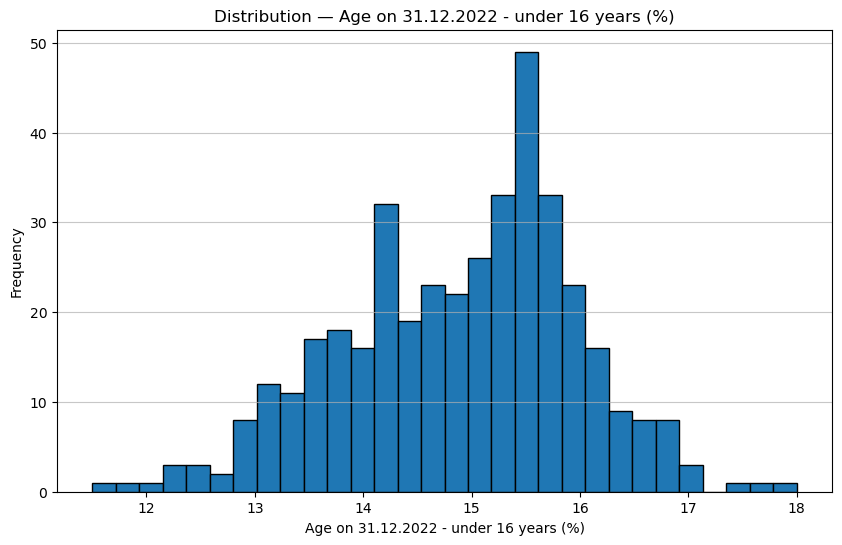

In [33]:
from IPython.display import Image, display
import os

# Define the path to the saved figures
save_directory = 'figs'

# Example: Display a plot from the 'Age structure' family
family_dir = os.path.join(save_directory, 'age_structure')
plot_filename = 'age_on_31122022___under_16_years_distribution.png' # Replace with the actual filename of a generated plot

plot_path = os.path.join(family_dir, plot_filename)

if os.path.exists(plot_path):
    print(f"Displaying: {plot_path}")
    display(Image(plot_path))
else:
    print(f"Plot not found at: {plot_path}")